# EDA & Preprocessing
Project 2 - Malware Infection

Authors: Michele Benvenuto, Roberto Figueroa, Gustavo Mendez

In [1]:
import warnings
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from quickda.explore_data import *
from sklearn.preprocessing import LabelEncoder
# Own utils
from utils import reduce_memory_usage, get_dataset_dtypes, derivate_features

warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)

%matplotlib inline

Constants...

In [2]:
# NA values rate to ommit columns
NA_THRESHOLD = 0.90

# Rate of columns with unbalanced values on biggest category (skewed data)
UNBALANCED_COLS_THRESHOLD = 0.99

# High cardinality (more than N categories)
MAX_CATEGORIES_COUNT = 500

## Loading train dataset

This is a large dataset (4.38GB)...  For each chunk, we will reduce memory usage and optimize dataframe types...

**Load dtypes**

In [3]:
# Set datatypes
dtypes, numerical_columns, categorical_columns = get_dataset_dtypes()

**Load dataset by chunks**

In [4]:
# Load large dataset
df = pd.read_csv('./datasets/train.csv', dtype=dtypes)
df_test = pd.read_csv('./datasets/test.csv', dtype=dtypes)

In [5]:
df.shape

(8921483, 83)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8921483 entries, 0 to 8921482
Data columns (total 83 columns):
 #   Column                                             Dtype   
---  ------                                             -----   
 0   MachineIdentifier                                  category
 1   ProductName                                        category
 2   EngineVersion                                      category
 3   AppVersion                                         category
 4   AvSigVersion                                       category
 5   IsBeta                                             int8    
 6   RtpStateBitfield                                   float16 
 7   IsSxsPassiveMode                                   int8    
 8   DefaultBrowsersIdentifier                          float16 
 9   AVProductStatesIdentifier                          float32 
 10  AVProductsInstalled                                float16 
 11  AVProductsEnabled                    

In [7]:
df.head(5)

MachineIdentifier   ProductName EngineVersion  \
0  0000028988387b115f69f31a3bf04f09  win8defender   1.1.15100.1   
1  000007535c3f730efa9ea0b7ef1bd645  win8defender   1.1.14600.4   
2  000007905a28d863f6d0d597892cd692  win8defender   1.1.15100.1   
3  00000b11598a75ea8ba1beea8459149f  win8defender   1.1.15100.1   
4  000014a5f00daa18e76b81417eeb99fc  win8defender   1.1.15100.1   

        AppVersion  AvSigVersion  IsBeta  RtpStateBitfield  IsSxsPassiveMode  \
0  4.18.1807.18075  1.273.1735.0       0               7.0                 0   
1     4.13.17134.1    1.263.48.0       0               7.0                 0   
2  4.18.1807.18075  1.273.1341.0       0               7.0                 0   
3  4.18.1807.18075  1.273.1527.0       0               7.0                 0   
4  4.18.1807.18075  1.273.1379.0       0               7.0                 0   

   DefaultBrowsersIdentifier  AVProductStatesIdentifier  ...  \
0                        NaN                    53447.0  ...   
1                        NaN                    53447.0  ...   
2                        NaN                    53447.0  ...   
3                        NaN                    53447.0  ...   
4                        NaN                    53447.0  ...   

   Census_FirmwareVersionIdentifier  Census_IsSecureBootEnabled  \
0                           36144.0                           0   
1                           57858.0                           0   
2                           52682.0                           0   
3                           20050.0                           0   
4                           19844.0                           0   

   Census_IsWIMBootEnabled  Census_IsVirtualDevice  Census_IsTouchEnabled  \
0                      NaN                     0.0                      0   
1                      NaN                     0.0                      0   
2                      NaN                     0.0                      0   
3                      NaN                     0.0                      0   
4                      0.0                     0.0                      0   

   Census_IsPenCapable  Census_IsAlwaysOnAlwaysConnectedCapable  Wdft_IsGamer  \
0                    0                                      0.0           0.0   
1                    0                                      0.0           0.0   
2                    0                                      0.0           0.0   
3                    0                                      0.0           0.0   
4                    0                                      0.0           0.0   

  Wdft_RegionIdentifier HasDetections  
0                  10.0             0  
1                   8.0             0  
2                   3.0             0  
3                   3.0             1  
4                   1.0             1  

[5 rows x 83 columns]

## Data balance

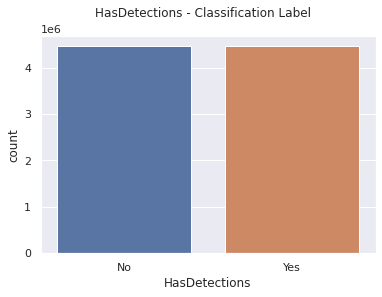

In [8]:
fig = plt.figure()
fig.suptitle('HasDetections - Classification Label')
plt.xlabel('Label')
plt.ylabel('Qty')

ax = sns.countplot(x="HasDetections", data=df)
ax.set(xticklabels=['No', 'Yes'])
plt.show()

In [9]:
df['HasDetections'].value_counts()

0    4462591
1    4458892
Name: HasDetections, dtype: int64

Dataset is balanced based on the target label col! Nothing to do here...

## Initial Exploration

### Numerical Columns

**QuickDA Summary**

In [10]:
explore(df[numerical_columns], method="summarize", is_large_dataset=True)

dtypes    count  null_sum  \
IsBeta                                                int8  8921483         0   
RtpStateBitfield                                   float16  8889165     32318   
IsSxsPassiveMode                                      int8  8921483         0   
DefaultBrowsersIdentifier                          float16   433438   8488045   
AVProductStatesIdentifier                          float32  8885262     36221   
AVProductsInstalled                                float16  8885262     36221   
AVProductsEnabled                                  float16  8885262     36221   
HasTpm                                                int8  8921483         0   
CountryIdentifier                                    int16  8921483         0   
CityIdentifier                                     float32  8596074    325409   
OrganizationIdentifier                             float16  6169965   2751518   
GeoNameIdentifier                                  float16  8921270       213   
LocaleEnglishNameIdentifier                           int8  8921483         0   
OsBuild                                              int16  8921483         0   
OsSuite                                              int16  8921483         0   
IsProtected                                        float16  8885439     36044   
AutoSampleOptIn                                       int8  8921483         0   
SMode                                              float16  8383724    537759   
IeVerIdentifier                                    float16  8862589     58894   
Firewall                                           float16  8830133     91350   
UacLuaenable                                       float32  8910645     10838   
Census_OEMNameIdentifier                           float16  8826005     95478   
Census_OEMModelIdentifier                          float32  8819250    102233   
Census_ProcessorCoreCount                          float16  8880177     41306   
Census_ProcessorManufacturerIdentifier             float16  8880170     41313   
Census_ProcessorModelIdentifier                    float16  8880140     41343   
Census_PrimaryDiskTotalCapacity                    float32  8868467     53016   
Census_SystemVolumeTotalCapacity                   float32  8868481     53002   
Census_HasOpticalDiskDrive                            int8  8921483         0   
Census_TotalPhysicalRAM                            float32  8840950     80533   
Census_InternalPrimaryDiagonalDisplaySizeInInches  float16  8874349     47134   
Census_InternalPrimaryDisplayResolutionHorizontal  float16  8874497     46986   
Census_InternalPrimaryDisplayResolutionVertical    float16  8874497     46986   
Census_InternalBatteryNumberOfCharges              float32  8652728    268755   
Census_OSBuildNumber                                 int16  8921483         0   
Census_OSBuildRevision                               int32  8921483         0   
Census_OSInstallLanguageIdentifier                 float16  8861399     60084   
Census_OSUILocaleIdentifier                          int16  8921483         0   
Census_IsPortableOperatingSystem                      int8  8921483         0   
Census_IsFlightingInternal                         float16  1512724   7408759   
Census_IsFlightsDisabled                           float16  8760960    160523   
Census_ThresholdOptIn                              float16  3254158   5667325   
Census_FirmwareManufacturerIdentifier              float16  8738226    183257   
Census_FirmwareVersionIdentifier                   float32  8761350    160133   
Census_IsSecureBootEnabled                            int8  8921483         0   
Census_IsWIMBootEnabled                            float16  3261780   5659703   
Census_IsVirtualDevice                             float16  8905530     15953   
Census_IsTouchEnabled                                 int8  8921483         0   
Census_IsPenCapable                                   int8  8921483         0   
Ce

### Categorical Columns

Here we found some highly skewed columns... later, we will see how to get rid of them 

In [11]:
def count_plot(col_name, is_binary=False):
    ax = sns.countplot(x=col_name, hue="HasDetections", data=df)
    ax.set_xlabel(col_name)
    ax.set_ylabel("count")
    if is_binary:
        ax.set(xticklabels=['No', 'Yes'])

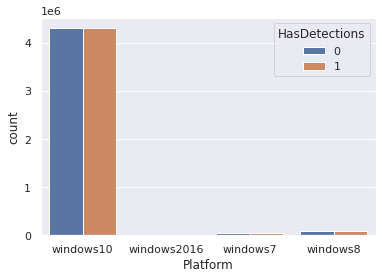

In [12]:
count_plot(df['Platform'].name)

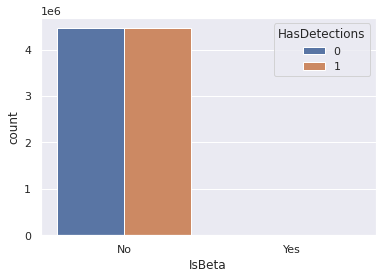

In [13]:
count_plot(df['IsBeta'].name, is_binary=True)

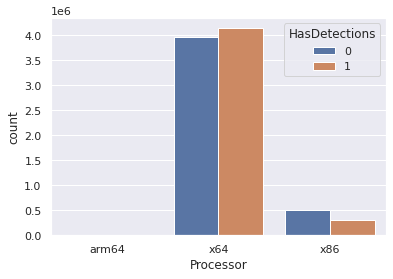

In [14]:
count_plot(df['Processor'].name)

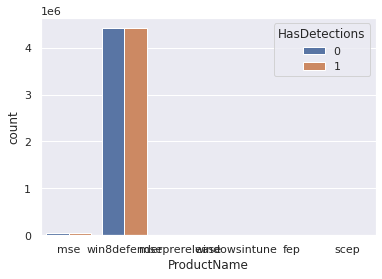

In [15]:
count_plot(df['ProductName'].name)

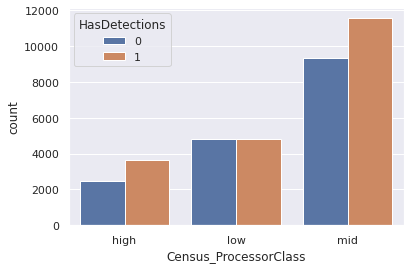

In [16]:
count_plot(df['Census_ProcessorClass'].name)

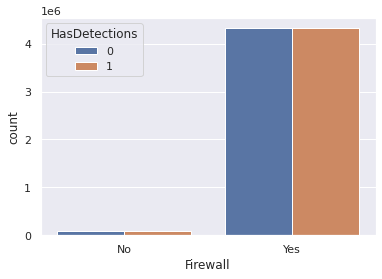

In [17]:
count_plot(df['Firewall'].name, is_binary=True)

### NA & Missing Data

**Check null values**

In [18]:
nan_cols = df.loc[:,df.isna().any()].columns.tolist()
print("Columns with at least one Nan value: \n", nan_cols)
print("Total: ", len(nan_cols))

Columns with at least one Nan value: 
 ['RtpStateBitfield', 'DefaultBrowsersIdentifier', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'OsBuildLab', 'IsProtected', 'PuaMode', 'SMode', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'UacLuaenable', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_ProcessorClass', 'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity', 'Census_TotalPhysicalRAM', 'Census_ChassisTypeName', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_PowerPlatformRoleName', 'Census_InternalBatteryType', 'Census_InternalBatteryNumberOfCharges', 'Census_OSInstallLanguageIdentifier', 'Census_IsFlightingInt

**Check missing data percentage per column**

In [19]:
total = df.isnull().sum().sort_values(ascending = False)
percent = round(df.isnull().sum() / df.isnull().count()*100, 2).sort_values(ascending = False)
missing_train_data  = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_train_data.head(10)

Total  Percent
PuaMode                     8919174    99.97
Census_ProcessorClass       8884852    99.59
DefaultBrowsersIdentifier   8488045    95.14
Census_IsFlightingInternal  7408759    83.04
Census_InternalBatteryType  6338429    71.05
Census_ThresholdOptIn       5667325    63.52
Census_IsWIMBootEnabled     5659703    63.44
SmartScreen                 3177011    35.61
OrganizationIdentifier      2751518    30.84
SMode                        537759     6.03

If we have a lot of missing values in a column we may consider dropping it on EDA...

There are:
74 columns without missing values
32 columns with less than 10% of missing values
 2 columns withmissing values between 10% and 50%
 7 columns with more than 50% of missing values


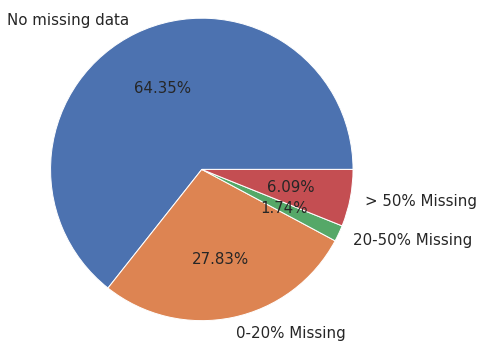

In [20]:
complete = (missing_train_data["Percent"]<=10).sum()
a = ((missing_train_data["Percent"]!=0) & (missing_train_data["Percent"]<=20)).sum()
b = ((missing_train_data["Percent"]>20) & (missing_train_data["Percent"]<=50)).sum()
c = (missing_train_data["Percent"]>50).sum()
print("There are:\n{} columns without missing values\n{} columns with less than 10% of missing values\n {} columns withmissing values between 10% and 50%\n {} columns with more than 50% of missing values".format(complete,a,b,c))

labels =["No missing data", "0-20% Missing", "20-50% Missing", "> 50% Missing"]
fig1, ax1 = plt.subplots(figsize=(6,6))
ax1.pie([complete,a,b,c],autopct='%1.2f%%',labels=labels, textprops={'fontsize': 15})
ax1.axis('equal')
plt.show()

**Let's take a look ahead of missing values...**

In [21]:
percent_stats = []
for col in df.columns:
    percent_stats.append((col, df[col].nunique(), round(df[col].isnull().sum() * 100 / df.shape[0], 2), round(df[col].value_counts(normalize=True).values[0] * 100, 2)))
    
percent_stats_df = pd.DataFrame(percent_stats, columns=['Feature', 'Unique Values', 'Missing Percent', 'Missing Percent in common category'])
percent_stats_df.sort_values('Missing Percent', ascending=False)

Feature  Unique Values  \
28                                            PuaMode              2   
41                              Census_ProcessorClass              3   
8                           DefaultBrowsersIdentifier           1730   
68                         Census_IsFlightingInternal              2   
52                         Census_InternalBatteryType             78   
71                              Census_ThresholdOptIn              2   
75                            Census_IsWIMBootEnabled              2   
31                                        SmartScreen             21   
15                             OrganizationIdentifier             49   
29                                              SMode              2   
14                                     CityIdentifier         107366   
80                                       Wdft_IsGamer              2   
81                              Wdft_RegionIdentifier             15   
53              Census_InternalBatteryNumberOfCharges          41087   
72              Census_FirmwareManufacturerIdentifier            712   
69                           Census_IsFlightsDisabled              2   
73                   Census_FirmwareVersionIdentifier          50494   
37                          Census_OEMModelIdentifier         175365   
36                           Census_OEMNameIdentifier           2564   
32                                           Firewall              2   
46                            Census_TotalPhysicalRAM           3446   
79            Census_IsAlwaysOnAlwaysConnectedCapable              2   
62                 Census_OSInstallLanguageIdentifier             39   
30                                    IeVerIdentifier            303   
42                    Census_PrimaryDiskTotalCapacity           5735   
44                   Census_SystemVolumeTotalCapacity         536848   
48  Census_InternalPrimaryDiagonalDisplaySizeInInches            785   
49  Census_InternalPrimaryDisplayResolutionHorizontal           2050   
50    Census_InternalPrimaryDisplayResolutionVertical           1552   
38                          Census_ProcessorCoreCount             45   
40                    Census_ProcessorModelIdentifier           2583   
39             Census_ProcessorManufacturerIdentifier              7   
11                                  AVProductsEnabled              6   
9                           AVProductStatesIdentifier          28970   
10                                AVProductsInstalled              8   
26                                        IsProtected              2   
6                                    RtpStateBitfield              7   
76                             Census_IsVirtualDevice              2   
43                         Census_PrimaryDiskTypeName              4   
33                                       UacLuaenable             11   
47                             Census_ChassisTypeName             52   
59                                   Census_OSEdition             33   
60                                   Census_OSSkuName             30   
58                             Census_OSBuildRevision            285   
63                        Census_OSUILocaleIdentifier            147   
61                           Census_OSInstallTypeName              9   
78                                Census_IsPenCapable              2   
56                                    Census_OSBranch             32   
64                   Census_OSWUAutoUpdateOptionsName              6   
65                   Census_IsPortableOperatingSystem              2   
66                            Census_GenuineStateName              5   
67                           Census_ActivationChannel              6   
77                              Census_IsTouchEnabled              2   
70                                  Census_FlightRing             10   
74                         Census_IsSecureBootEnabled              2   
57            

## Feature Engineering

### Data Cleaning

#### Remove unnecessary/irrelevant columns

In [22]:
irrelevant_columns = ['MachineIdentifier']
categorical_columns.remove('MachineIdentifier')

df.drop(irrelevant_columns, axis=1, inplace=True)
df_test.drop(irrelevant_columns, axis=1, inplace=True)

#### Remove columns with high number of categories

In [23]:
too_many_categories_columns = [col for col in categorical_columns if df[col].nunique() >= MAX_CATEGORIES_COUNT]

df.drop(too_many_categories_columns, axis=1, inplace=True)
df_test.drop(too_many_categories_columns, axis=1, inplace=True)

#### Skewed Data
Remove columns with high unbalanced and missing values rate

In [24]:
# Step 1: Copy original columns
cleaned_cols = list(df.columns)

# Step 2: Keep only columns with low rate on their missing values...
for col in df.columns:
    # Remove NA values with high missing rate
    na_rate = df[col].isnull().sum() / df.shape[0]
    # Remove cols with high unbalanced values rate
    unbalanced_rate = df[col].value_counts(normalize=True).values[0]
    
    if na_rate >= NA_THRESHOLD or unbalanced_rate >= UNBALANCED_COLS_THRESHOLD:
        cleaned_cols.remove(col)

**Cleaned columns**

In [25]:
print('Columns with low missing values rate: ', cleaned_cols)
print('Total: ', len(cleaned_cols))

Columns with low missing values rate:  ['ProductName', 'EngineVersion', 'AppVersion', 'RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'Platform', 'Processor', 'OsVer', 'OsBuild', 'OsSuite', 'OsPlatformSubRelease', 'SkuEdition', 'IsProtected', 'IeVerIdentifier', 'SmartScreen', 'Firewall', 'Census_MDC2FormFactor', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_PrimaryDiskTypeName', 'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM', 'Census_ChassisTypeName', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionV

OK, from 83 cols we moved to 66 cols with more relevant information...

**New categorical columns**

These are our useful categorical columns

In [26]:
categorical_columns = [item for item in categorical_columns if item in cleaned_cols]

print('Useful categorical columns: ', categorical_columns)
print('Total: ', len(categorical_columns))

Useful categorical columns:  ['ProductName', 'EngineVersion', 'AppVersion', 'Platform', 'Processor', 'OsVer', 'OsPlatformSubRelease', 'SkuEdition', 'SmartScreen', 'Census_MDC2FormFactor', 'Census_PrimaryDiskTypeName', 'Census_ChassisTypeName', 'Census_PowerPlatformRoleName', 'Census_InternalBatteryType', 'Census_OSVersion', 'Census_OSArchitecture', 'Census_OSBranch', 'Census_OSEdition', 'Census_OSSkuName', 'Census_OSInstallTypeName', 'Census_OSWUAutoUpdateOptionsName', 'Census_GenuineStateName', 'Census_ActivationChannel', 'Census_FlightRing']
Total:  24


**New numerical columns**

These are our useful numerical columns

In [27]:
numerical_columns = [item for item in numerical_columns if item in cleaned_cols]
print('Useful numerical columns: ', numerical_columns)
print('Total: ', len(numerical_columns))

Useful numerical columns:  ['RtpStateBitfield', 'IsSxsPassiveMode', 'AVProductStatesIdentifier', 'AVProductsInstalled', 'AVProductsEnabled', 'HasTpm', 'CountryIdentifier', 'CityIdentifier', 'OrganizationIdentifier', 'GeoNameIdentifier', 'LocaleEnglishNameIdentifier', 'OsBuild', 'OsSuite', 'IsProtected', 'IeVerIdentifier', 'Firewall', 'Census_OEMNameIdentifier', 'Census_OEMModelIdentifier', 'Census_ProcessorCoreCount', 'Census_ProcessorManufacturerIdentifier', 'Census_ProcessorModelIdentifier', 'Census_PrimaryDiskTotalCapacity', 'Census_SystemVolumeTotalCapacity', 'Census_HasOpticalDiskDrive', 'Census_TotalPhysicalRAM', 'Census_InternalPrimaryDiagonalDisplaySizeInInches', 'Census_InternalPrimaryDisplayResolutionHorizontal', 'Census_InternalPrimaryDisplayResolutionVertical', 'Census_InternalBatteryNumberOfCharges', 'Census_OSBuildNumber', 'Census_OSBuildRevision', 'Census_OSInstallLanguageIdentifier', 'Census_OSUILocaleIdentifier', 'Census_FirmwareManufacturerIdentifier', 'Census_Firmwar

**Binary columns**

There are our useful binary columns

In [28]:
binary_columns = []
for col in numerical_columns:
    if df[col].nunique() == 2:
        binary_columns.append(col)
        numerical_columns.remove(col)

for col in categorical_columns:
    if df[col].nunique() == 2:
        binary_columns.append(col)
        categorical_columns.remove(col)
        
print('Useful binary columns: ', binary_columns)
print('Total: ', len(binary_columns))

Useful binary columns:  ['IsSxsPassiveMode', 'HasTpm', 'IsProtected', 'Firewall', 'Census_HasOpticalDiskDrive', 'Census_IsSecureBootEnabled', 'Census_IsPenCapable', 'Wdft_IsGamer', 'HasDetections']
Total:  9


**Reduced dataframe**

In [29]:
cleaned_cols = categorical_columns + numerical_columns + binary_columns
test_cleaned_cols =  [item for item in cleaned_cols]
test_cleaned_cols.remove('HasDetections')

original_memory_usage = df.memory_usage().sum()

# Free memory
del percent_stats_df

In [30]:
df = df[cleaned_cols]
df_test = df_test[test_cleaned_cols]

new_memory_usage = df.memory_usage().sum()

print('New memory usage (%): {}%'.format(round((new_memory_usage / original_memory_usage ) * 100, 2)))

New memory usage (%): 83.22%


#### Fill missing value

In [31]:
# Nan Values
null_counts = df.isnull().sum()
null_counts = null_counts / df.shape[0]
null_counts[null_counts > 0.1]

SmartScreen                   0.356108
Census_InternalBatteryType    0.710468
OrganizationIdentifier        0.308415
dtype: float64

**Fill SmartScreen**

In [32]:
screen_keywords_dict = {
    'off': 'Off', '&#x02;': '2', '&#x01;': '1', 'on': 'On', 'requireadmin': 'RequireAdmin', 'OFF': 'Off', 'Promt': 'Prompt', 'requireAdmin': 'RequireAdmin', 'prompt': 'Prompt', 'warn': 'Warn', '00000000': '0', '&#x03;': '3',
}
# Replace and set the new NaN category...
df.replace({'SmartScreen': screen_keywords_dict}, inplace=True)
df['SmartScreen'] = df['SmartScreen'].cat.add_categories(['NoExist'])
df['SmartScreen'].fillna('NoExist', inplace=True)

df_test.replace({'SmartScreen': screen_keywords_dict}, inplace=True)
df_test['SmartScreen'] = df_test['SmartScreen'].cat.add_categories(['NoExist'])
df_test['SmartScreen'].fillna('NoExist', inplace=True)

In [33]:
df['SmartScreen'].isnull().sum()

0

**Fill Census_InternalBatteryType**

In [34]:
battery_keywords_dict = {
    '˙˙˙': 'unknown', 'unkn': 'unknown', np.nan: 'unknown'
}

df.replace({'Census_InternalBatteryType': battery_keywords_dict}, inplace=True)
df['Census_InternalBatteryType'].fillna('unknown', inplace=True)

df_test.replace({'Census_InternalBatteryType': battery_keywords_dict}, inplace=True)
df_test['Census_InternalBatteryType'].fillna('unknown', inplace=True)

In [35]:
df['Census_InternalBatteryType'].isnull().sum()

0

**Fill OrganizationIdentifier**

In [36]:
df.replace({'OrganizationIdentifier': {np.nan: 0}}, inplace=True)
df['OrganizationIdentifier'].fillna(0, inplace=True)

df_test.replace({'OrganizationIdentifier': {np.nan: 0}}, inplace=True)
df_test['OrganizationIdentifier'].fillna(0, inplace=True)

In [37]:
df['OrganizationIdentifier'].isnull().sum()

0

#### Remove missing values

In [38]:
df.dropna(inplace=True)
df_test.dropna(inplace=True)

**Final shape after cleaning**

In [39]:
df.shape

(7667799, 66)

## Preprocessing

### Feature derivation

In [40]:
df = derivate_features(df)
df_test = derivate_features(df_test)

df.head(5)

ProductName EngineVersion       AppVersion   Platform Processor     OsVer  \
0  win8defender   1.1.15100.1  4.18.1807.18075  windows10       x64  10.0.0.0   
1  win8defender   1.1.14600.4     4.13.17134.1  windows10       x64  10.0.0.0   
2  win8defender   1.1.15100.1  4.18.1807.18075  windows10       x64  10.0.0.0   
3  win8defender   1.1.15100.1  4.18.1807.18075  windows10       x64  10.0.0.0   
4  win8defender   1.1.15100.1  4.18.1807.18075  windows10       x64  10.0.0.0   

  OsPlatformSubRelease SkuEdition   SmartScreen Census_MDC2FormFactor  ...  \
0                  rs4        Pro       NoExist               Desktop  ...   
1                  rs4        Pro       NoExist              Notebook  ...   
2                  rs4       Home  RequireAdmin               Desktop  ...   
3                  rs4        Pro  ExistsNotSet               Desktop  ...   
4                  rs4       Home  RequireAdmin              Notebook  ...   

  HasDetections EngineVersion_2 EngineVersion_3 AppVersion_1 AppVersion_2  \
0             0           15100               1           18         1807   
1             0           14600               4           13        17134   
2             0           15100               1           18         1807   
3             1           15100               1           18         1807   
4             1           15100               1           18         1807   

  AppVersion_3 Census_OSVersion_0 Census_OSVersion_1 Census_OSVersion_2  \
0        18075                 10                  0              17134   
1            1                 10                  0              17134   
2        18075                 10                  0              17134   
3        18075                 10                  0              17134   
4        18075                 10                  0              17134   

  Census_OSVersion_3  
0                165  
1                  1  
2                165  
3                228  
4                191  

[5 rows x 75 columns]

### Encoding

In [41]:
le = LabelEncoder()
categorical_columns = list(df.select_dtypes(include=['category']).columns)

for col in categorical_columns:
    # Fit transform
    df[col] = le.fit_transform(df[col])
    df_test[col] = le.fit_transform(df_test[col])

In [42]:
df.head(5)

ProductName  EngineVersion  AppVersion  Platform  Processor  OsVer  \
0            3             61          59         0          1      0   
1            3             51          26         0          1      0   
2            3             61          59         0          1      0   
3            3             61          59         0          1      0   
4            3             61          59         0          1      0   

   OsPlatformSubRelease  SkuEdition  SmartScreen  Census_MDC2FormFactor  ...  \
0                     4           6            7                      2  ...   
1                     4           6            7                      8  ...   
2                     4           4           11                      2  ...   
3                     4           6            6                      2  ...   
4                     4           4           11                      8  ...   

   HasDetections  EngineVersion_2  EngineVersion_3  AppVersion_1  \
0              0               55                1             8   
1              0               50                4             3   
2              0               55                1             8   
3              1               55                1             8   
4              1               55                1             8   

   AppVersion_2  AppVersion_3  Census_OSVersion_0  Census_OSVersion_1  \
0            25            53                   0                   0   
1             6             1                   0                   0   
2            25            53                   0                   0   
3            25            53                   0                   0   
4            25            53                   0                   0   

   Census_OSVersion_2  Census_OSVersion_3  
0                  84                  74  
1                  84                   1  
2                  84                  74  
3                  84                 151  
4                  84                 128  

[5 rows x 75 columns]

### Correlation

In [43]:
df = reduce_memory_usage(df)
df_test = reduce_memory_usage(df_test)

Mem. usage decreased to 994.51 Mb (62.8% reduction)
Mem. usage decreased to 875.57 Mb (63.0% reduction)


In [44]:
corr_cols_to_remove = []

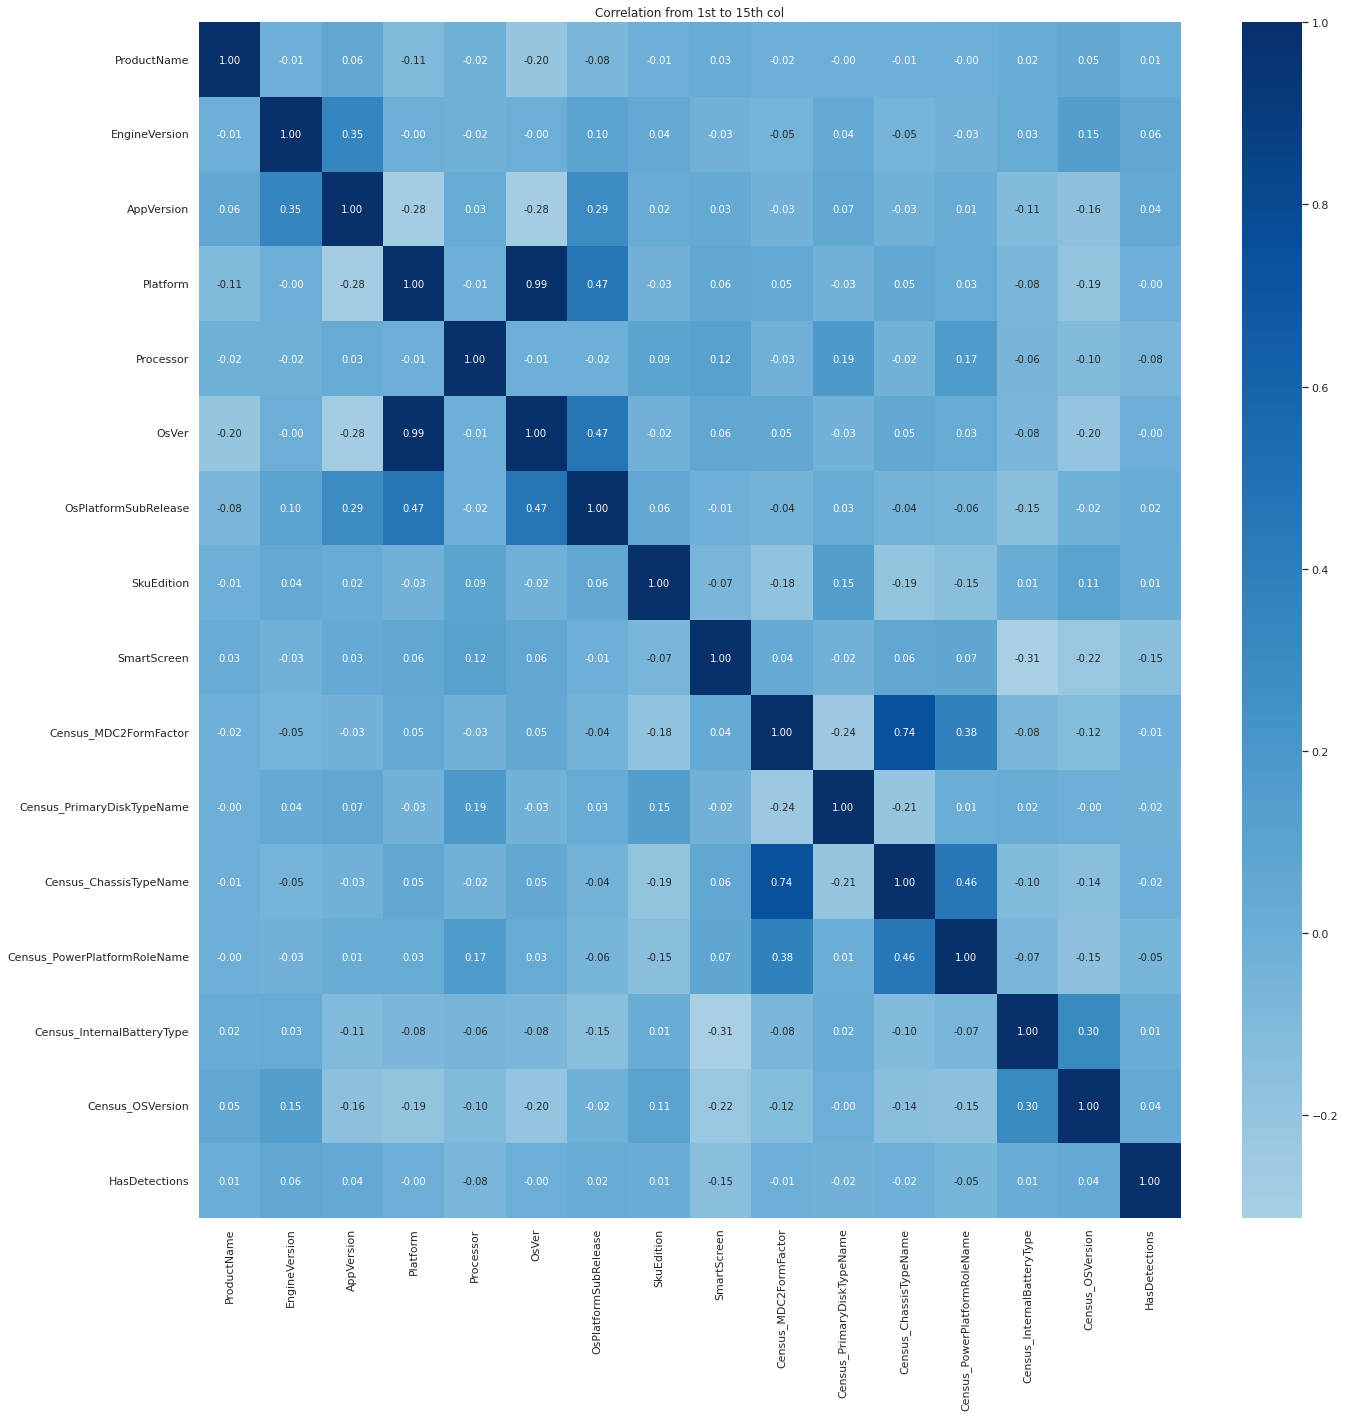

In [45]:
corr_cols = cleaned_cols[0:15]
corr_cols.append('HasDetections')
plt.figure(figsize=(22,22))
sns.heatmap(df[corr_cols].corr(), cmap='Blues', annot=True, center=0.0, fmt='.2f')
plt.title('Correlation from 1st to 15th col')
plt.show()

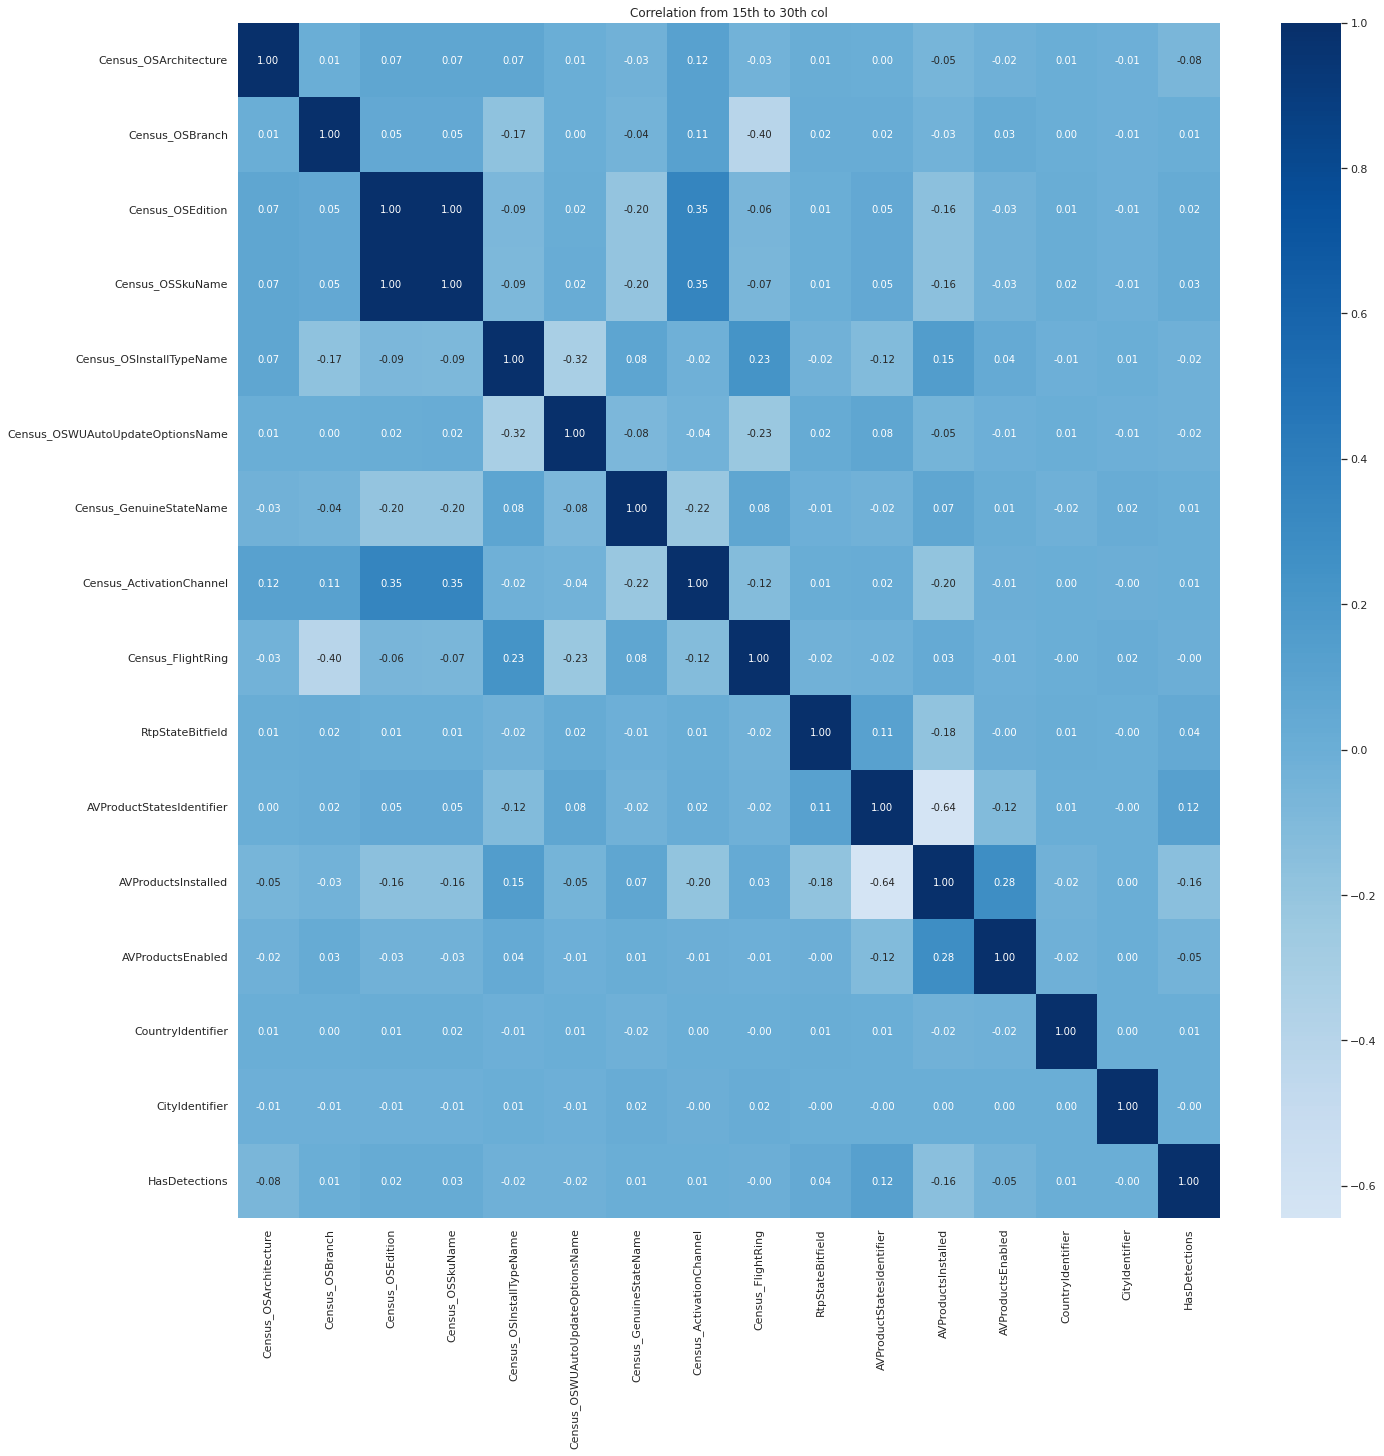

In [46]:
corr_cols = cleaned_cols[15:30]
corr_cols.append('HasDetections')
plt.figure(figsize=(22,22))
sns.heatmap(df[corr_cols].corr(), cmap='Blues', annot=True, center=0.0, fmt='.2f')
plt.title('Correlation from 15th to 30th col')
plt.show()

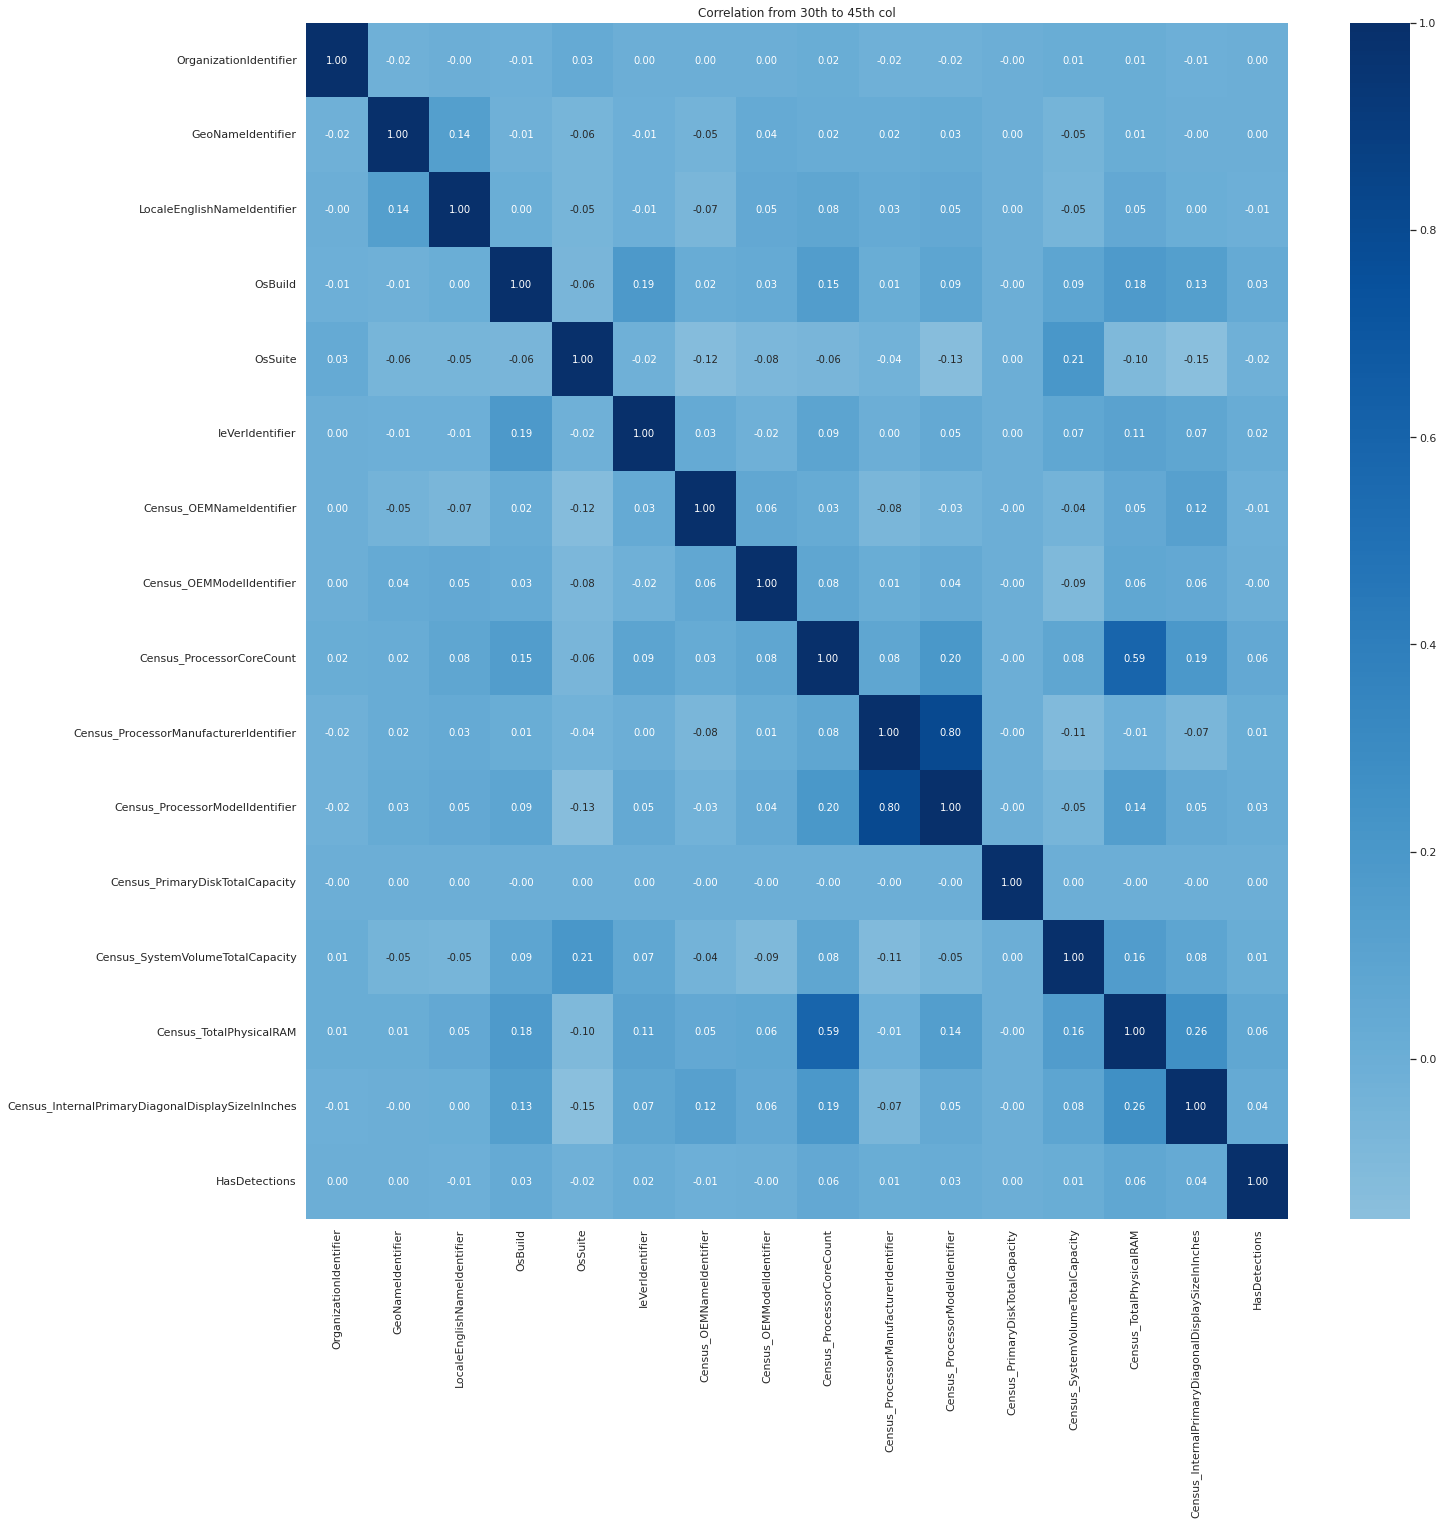

In [47]:
corr_cols = cleaned_cols[30:45]
corr_cols.append('HasDetections')
plt.figure(figsize=(22,22))
sns.heatmap(df[corr_cols].corr(), cmap='Blues', annot=True, center=0.0, fmt='.2f')
plt.title('Correlation from 30th to 45th col')
plt.show()

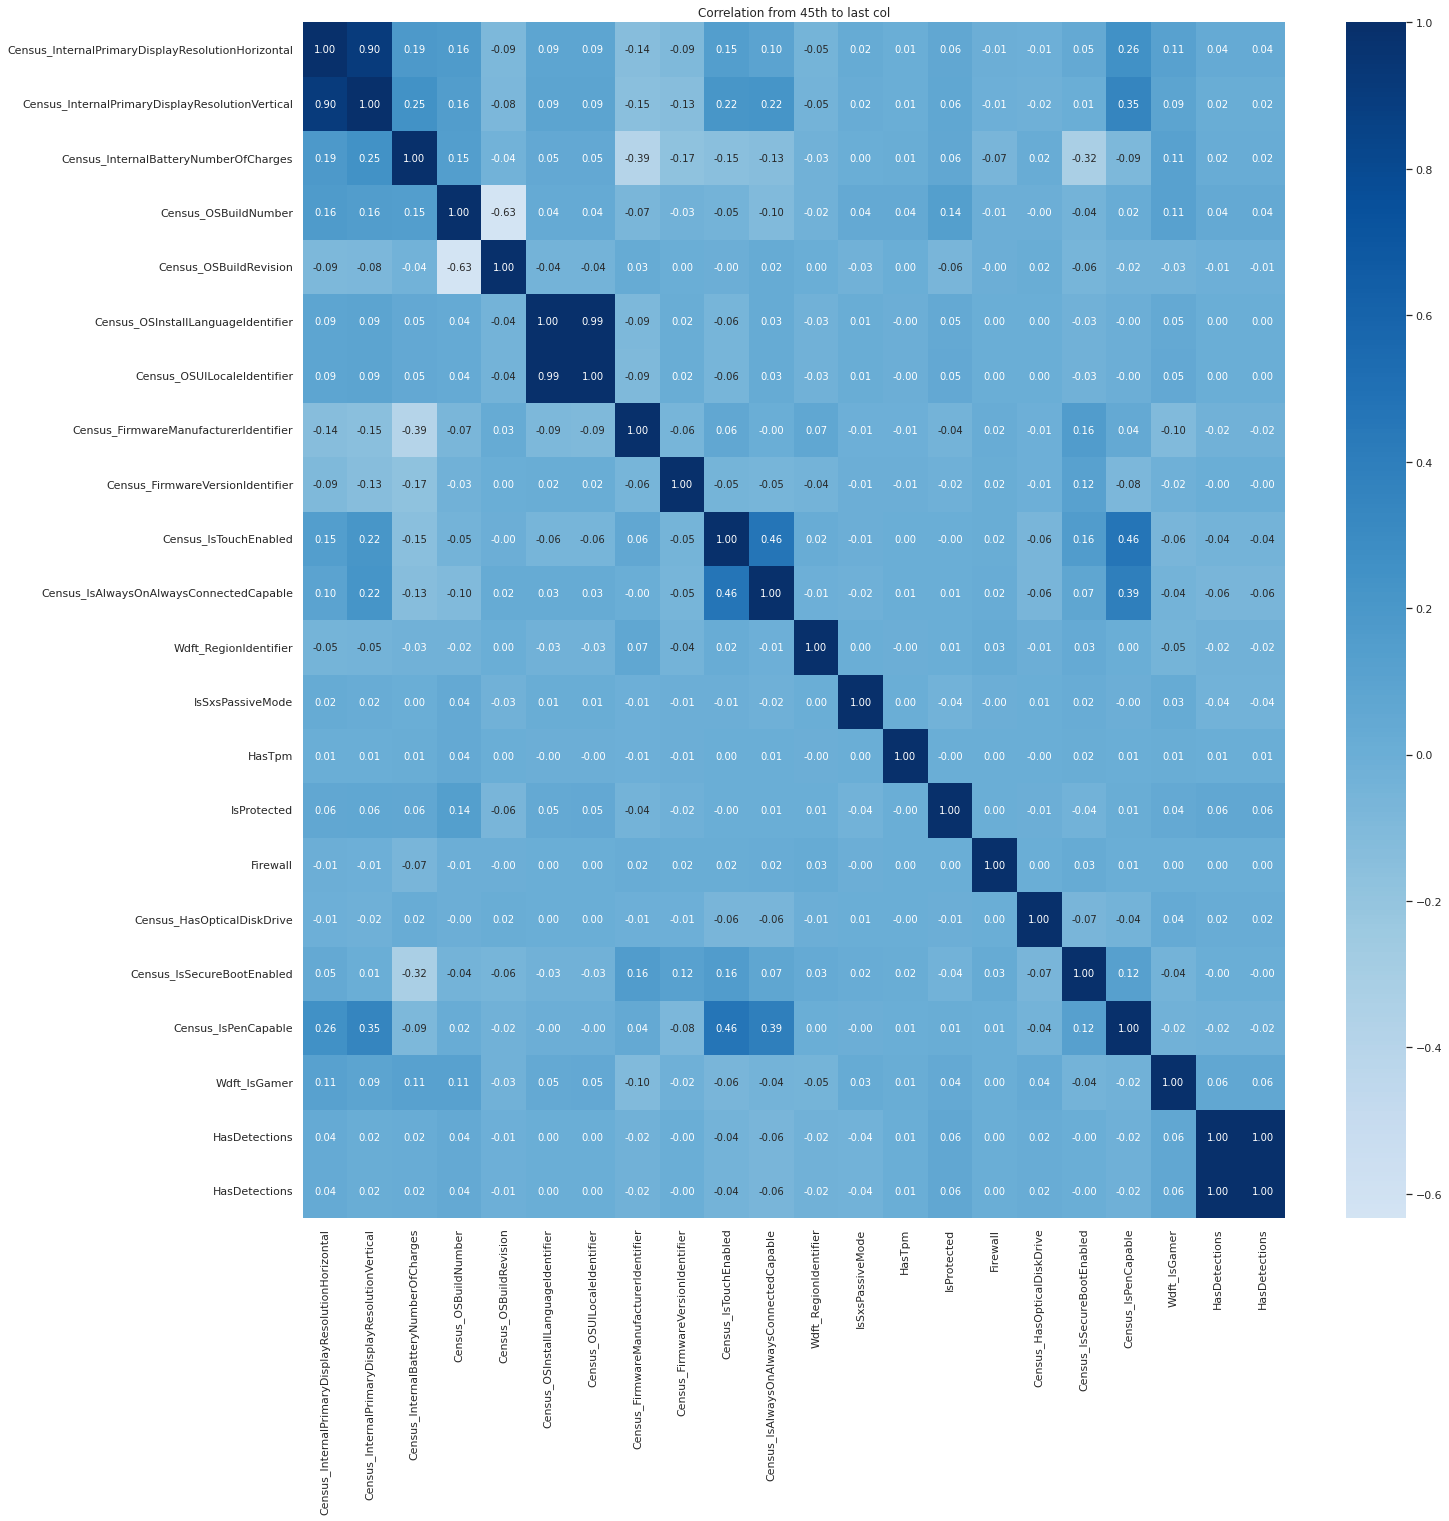

In [48]:
corr_cols = cleaned_cols[45:]
corr_cols.append('HasDetections')
plt.figure(figsize=(22,22))
sns.heatmap(df[corr_cols].corr(), cmap='Blues', annot=True, center=0.0, fmt='.2f')
plt.title('Correlation from 45th to last col')
plt.show()

**Remove correlated columns (>= 0.75)**

In [49]:
print(df['Census_OSEdition'].nunique(), df['Census_OSSkuName'].nunique())
print(df['Census_OSEdition'].nunique(), df['SkuEdition'].nunique())
print(df['Platform'].nunique(), df['OsVer'].nunique())
print(df['Processor'].nunique(), df['Census_OSArchitecture'].nunique())

print(df['Census_ProcessorModelIdentifier'].nunique(), df['Census_ProcessorManufacturerIdentifier'].nunique())
print(df['Census_OSInstallLanguageIdentifier'].nunique(), df['Census_OSUILocaleIdentifier'].nunique())
print(df['OsBuild'].nunique(), df['Census_OSBuildNumber'].nunique())
print(df['Census_InternalPrimaryDisplayResolutionHorizontal'].nunique(), df['Census_InternalPrimaryDisplayResolutionVertical'].nunique())

29 25
29 7
3 45
3 3
2340 6
39 144
71 150
1581 1234


Houston, we have a problem on the following column with same num of unique values...

**Processor vs Census_OSArch**

In [50]:
df[['Census_OSArchitecture', 'Processor', 'HasDetections']].corr()

Census_OSArchitecture  Processor  HasDetections
Census_OSArchitecture               1.000000   0.995081      -0.075764
Processor                           0.995081   1.000000      -0.075787
HasDetections                      -0.075764  -0.075787       1.000000

We must drop 'Processor' col!

In [51]:
# Keep only the cols with more categories or unique values!
corr_cols_to_remove.append('Census_OSSkuName')
corr_cols_to_remove.append('SkuEdition')
corr_cols_to_remove.append('Platform')
corr_cols_to_remove.append('Processor')

corr_cols_to_remove.append('Census_ProcessorManufacturerIdentifier')
corr_cols_to_remove.append('Census_OSInstallLanguageIdentifier')
corr_cols_to_remove.append('OsBuild')
corr_cols_to_remove.append('Census_InternalPrimaryDisplayResolutionVertical')

**Drop correlated columns**

In [52]:
df.drop(corr_cols_to_remove, axis=1, inplace=True)
df_test.drop(corr_cols_to_remove, axis=1, inplace=True)

**Verify wrong negative values on columns...**

In [53]:
numerical_columns = list(df.select_dtypes(exclude=['category']).columns)
(df[numerical_columns] < 0).apply(lambda x: any(x))

ProductName                                          False
EngineVersion                                        False
AppVersion                                           False
OsVer                                                False
OsPlatformSubRelease                                 False
SmartScreen                                          False
Census_MDC2FormFactor                                False
Census_PrimaryDiskTypeName                           False
Census_ChassisTypeName                               False
Census_PowerPlatformRoleName                         False
Census_InternalBatteryType                           False
Census_OSVersion                                     False
Census_OSArchitecture                                False
Census_OSBranch                                      False
Census_OSEdition                                     False
Census_OSInstallTypeName                             False
Census_OSWUAutoUpdateOptionsName                     Fal

OK, some LocaleEnglishNameIdentifier (ids) are negative, but there's no problem here cause they are just IDs...

BUT Census_InternalPrimaryDisplayResolutionHorizontal must have positive values!

In [56]:
df = df[df['Census_InternalPrimaryDisplayResolutionHorizontal'] >= 0]
df_test = df_test[df_test['Census_InternalPrimaryDisplayResolutionHorizontal'] >= 0]

### Export modified train dataset

In [57]:
df = reduce_memory_usage(df)
df_test = reduce_memory_usage(df_test)

# Finally remove NaN btw
df.dropna(inplace=True)
df_test.dropna(inplace=True)

df.to_csv('./datasets/train_preprocessed.csv')
df_test.to_csv('./datasets/test_preprocessed.csv')

print(df.shape)
print(df_test.shape)

del df, df_test

Mem. usage decreased to 906.76 Mb (0.0% reduction)
Mem. usage decreased to 797.74 Mb (0.0% reduction)
(7667792, 67)
(6800770, 66)


We conclude our EDA and Preprocessing phase...We're ready to make some PCA / Feature Selection before implement our models!